In [1]:
li = [i for i in range(100)]

In [2]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()

In [3]:
import numpy as np
li = np.array(li)

In [4]:
li = li.reshape(-1, 1)

In [5]:
li = sc.fit_transform(li)

In [6]:
train_x, train_y = [], []

In [7]:
steps = 10

In [8]:
for i in range(steps, len(li)):
  train_x.append(li[i-steps:i])
  train_y.append(li[i])

In [9]:
train_x = np.array(train_x)
train_y = np.array(train_y)

In [10]:
train_x.shape, train_y.shape

((90, 10, 1), (90, 1))

In [12]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [14]:
model=Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(LSTM(50,  return_sequences=True))
model.add(LSTM(50))
model.add(Dense(train_y.shape[1]))
model.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
#model.compile(optimizer='adam', metrics='mse')

In [16]:
hist = model.fit(train_x, train_y, epochs=10)

Epoch 1/10
3/3 [==============================] - 0s 11ms/step - loss: 0.7864
Epoch 2/10
3/3 [==============================] - 0s 10ms/step - loss: 0.5860
Epoch 3/10
3/3 [==============================] - 0s 10ms/step - loss: 0.3743
Epoch 4/10
3/3 [==============================] - 0s 9ms/step - loss: 0.1622
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 0.0490
Epoch 6/10
3/3 [==============================] - 0s 10ms/step - loss: 0.0705
Epoch 7/10
3/3 [==============================] - 0s 11ms/step - loss: 0.0460
Epoch 8/10
3/3 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 9/10
3/3 [==============================] - 0s 10ms/step - loss: 0.0254
Epoch 10/10
3/3 [==============================] - 0s 10ms/step - loss: 0.0303


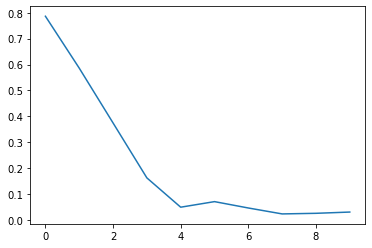

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])


In [18]:
temp = train_x[-1]
temp

array([[1.36838856],
       [1.40303131],
       [1.43767406],
       [1.4723168 ],
       [1.50695955],
       [1.5416023 ],
       [1.57624505],
       [1.6108878 ],
       [1.64553055],
       [1.68017329]])

In [19]:
temp.shape

(10, 1)

In [20]:
type(temp)

numpy.ndarray

In [21]:
x_input = temp.reshape(1, temp.shape[0], temp.shape[1])

In [22]:
x_input.shape

(1, 10, 1)

In [23]:
pred = model.predict(x_input)
pred

array([[1.3191391]], dtype=float32)

In [24]:
sc.inverse_transform(pred)

array([[87.57836]], dtype=float32)

In [25]:
type(pred)

numpy.ndarray

In [26]:
next = np.append(temp,pred)
next


array([1.36838856, 1.40303131, 1.43767406, 1.4723168 , 1.50695955,
       1.5416023 , 1.57624505, 1.6108878 , 1.64553055, 1.68017329,
       1.31913912])

In [32]:
next.shape

(11,)

In [27]:
temp1 = next[-10:]
temp1

array([1.40303131, 1.43767406, 1.4723168 , 1.50695955, 1.5416023 ,
       1.57624505, 1.6108878 , 1.64553055, 1.68017329, 1.31913912])

In [28]:
temp1.shape

(10,)

In [29]:
x_input1 = temp1.reshape(1, temp1.shape[0], 1)
x_input1.shape

(1, 10, 1)

In [30]:
pred_2 = model.predict(x_input1)
pred_2

array([[1.3338765]], dtype=float32)

In [125]:
sc.inverse_transform(pred_2)

array([[88.00377]], dtype=float32)

In [126]:
temp_for = train_x[-1]

In [127]:
li = []

In [128]:
# creating for loop for n number of prediction
timestamp = 10
days = 10
for i in range(days):
    x_input_for = temp_for.reshape(1, temp_for.shape[0],1)
    pred_for = model.predict(x_input_for).flatten()
    li.append(pred_for)
    next_for = np.append(temp_for,pred_for)
    temp_for = next_for[-timestamp:]




In [129]:
li

[array([1.3191391], dtype=float32),
 array([1.3338765], dtype=float32),
 array([1.343784], dtype=float32),
 array([1.3484823], dtype=float32),
 array([1.347953], dtype=float32),
 array([1.3423115], dtype=float32),
 array([1.3316642], dtype=float32),
 array([1.3160257], dtype=float32),
 array([1.2952744], dtype=float32),
 array([1.2691554], dtype=float32)]

In [130]:
sc.inverse_transform(np.array(li))

array([[87.57836 ],
       [88.00377 ],
       [88.289764],
       [88.425385],
       [88.4101  ],
       [88.24725 ],
       [87.93991 ],
       [87.488495],
       [86.88948 ],
       [86.13553 ]], dtype=float32)

In [83]:
#1
pred_for.flatten().shape

(1,)

In [73]:
sc.inverse_transform(pred_for)

array([[87.57836]], dtype=float32)

In [74]:
# 1
next_for

array([1.36838856, 1.40303131, 1.43767406, 1.4723168 , 1.50695955,
       1.5416023 , 1.57624505, 1.6108878 , 1.64553055, 1.68017329,
       1.31913912])

In [75]:
#1
temp_for

array([1.40303131, 1.43767406, 1.4723168 , 1.50695955, 1.5416023 ,
       1.57624505, 1.6108878 , 1.64553055, 1.68017329, 1.31913912])

In [65]:
#temp_for.reshape(-1, 1).shape

(10, 1)

In [62]:
#(temp_for.reshape(-1,1)).shape

(10, 1)

In [76]:
#2
next_for

array([1.36838856, 1.40303131, 1.43767406, 1.4723168 , 1.50695955,
       1.5416023 , 1.57624505, 1.6108878 , 1.64553055, 1.68017329,
       1.31913912])

In [68]:
temp_for

array([1.43767406, 1.4723168 , 1.50695955, 1.5416023 , 1.57624505,
       1.6108878 , 1.64553055, 1.68017329, 1.31913912, 1.33387649])

# Repeating code with large example to check the accuracy